In [1]:
import numpy as np
import pandas as pd

In [2]:
# pandas => Dataframe
df = pd.read_csv('https://bit.ly/perch_csv_data')

In [3]:
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [4]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()

poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

In [7]:
3.0e+0

3.0

In [8]:
poly = PolynomialFeatures()
poly.fit(train_input)
train_poly = poly.transform(train_input)

In [9]:
test_poly = poly.transform(test_input)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [11]:
lr.score(train_poly, train_target)

0.9903183436982125

In [12]:
lr.score(test_poly, test_target)

0.971455991159412

In [13]:
# 무조건 특성(파라미터)의 차원을 올려버릴 경우
poly = PolynomialFeatures(degree=5, include_bias=False)
train_5_poly = poly.fit_transform(train_input)
test_5_poly = poly.transform(test_input)

In [14]:
# 훈련 데이터에 대해서는 거의 완벽하게 나옴
lr.fit(train_5_poly, train_target)
lr.score(train_5_poly, train_target)

0.9999999999996176

In [15]:
# 테스트 데이터에서 말도 안되는 점수(Super Overfitting)
lr.score(test_5_poly, test_target)

-144.40585108215134

In [16]:
# 표준화 => 규제(과적합)

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_5_poly)
# 단순 수치 => 평균(0)에서 얼마나 떨어져 있는가.
train_scaled = ss.transform(train_5_poly)
test_scaled = ss.transform(test_5_poly)


In [18]:
# LinearRegression => 기본적인 선형 회귀 예측기
# Ridge/Lasso => 선형회귀에 제약을 둬서, 모델의 과적합을 피하고 성능 좋은 모델로 간다.
from sklearn.linear_model import Ridge
# alpha(규제)값은 1이 기본값 => 하이퍼파라미터(학습전에 인간이 결정해야하는 값)
ridge = Ridge(alpha=1)
ridge.fit(train_scaled, train_target)

ridge.score(train_scaled, train_target)

0.9896101671037343

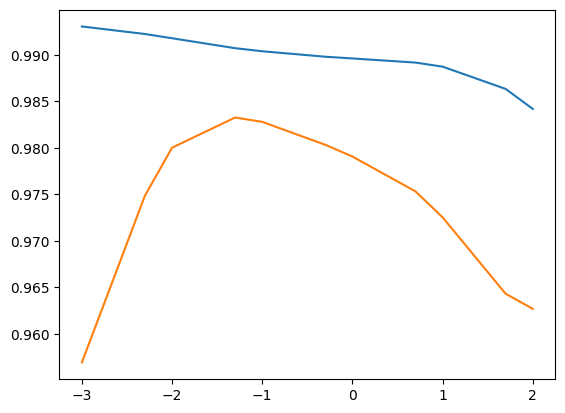

In [19]:
# alpha(규제값) 조정을 통해 점수 비교 그래프 그리기
import matplotlib.pyplot as plt
train_scores = []
test_scores = []

alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    score1 = ridge.score(train_scaled, train_target)
    score2 = ridge.score(test_scaled, test_target)
    train_scores.append(score1)
    test_scores.append(score2)

plt.plot(np.log10(alphas), train_scores)
plt.plot(np.log10(alphas), test_scores)

In [20]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.989789897208096

In [21]:
lasso.score(test_scaled, test_target)

0.9800593698421884

c:\Users\1-00\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\1-00\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.305e+03, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\1-00\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

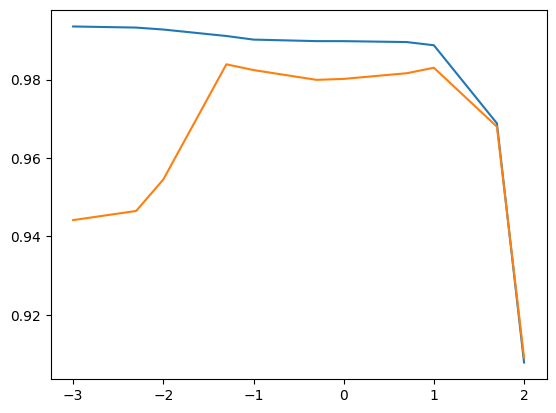

In [22]:
# alpha(규제값) 조정을 통해 점수 비교 그래프 그리기
train_scores = []
test_scores = []

alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(train_scaled, train_target)
    score1 = lasso.score(train_scaled, train_target)
    score2 = lasso.score(test_scaled, test_target)
    train_scores.append(score1)
    test_scores.append(score2)

plt.plot(np.log10(alphas), train_scores)
plt.plot(np.log10(alphas), test_scores)

In [23]:
# 각 특성별 가중치(기울기)
# ridge/lasso 는 scaling(표준화) 진행
print('basic linear', lr.coef_)
print('ridge', ridge.coef_)
print('lasso', lasso.coef_)

basic linear [-2.09045233e+04 -1.28202656e+03 -5.60579423e+03  2.08209788e+03
  1.22295888e+03 -1.43810563e+03 -4.56954920e+03 -5.32865704e+02
  6.00791515e+03 -2.10685927e+01 -6.86635705e+01 -1.38721485e+03
 -1.07567682e+03  3.95368632e+03  5.36644083e+03  3.82397703e+03
 -5.41583153e+03 -7.44652620e+03 -3.57623029e+03 -8.28182210e+00
  3.60948613e+02 -4.02974094e+02 -3.16265249e+03  3.78222941e+03
  1.35359024e+03  9.49700050e+03 -9.03133743e+03 -7.05278766e+03
 -5.77027227e+03 -9.30122999e+03  5.09472356e+03  9.77749519e+03
  9.37624396e+03  7.91885386e+03 -2.17001643e+00  3.18812796e+01
  1.05746226e+01  1.25146689e+02 -1.16343653e+03  8.34278217e+02
 -1.83477727e+03  7.09704419e+03 -1.74949662e+03 -3.82035555e+03
  5.50890278e+03 -1.57854132e+04 -1.46746249e+03  8.08796344e+03
  8.01723336e+03 -5.22511893e+03  1.18583191e+04  6.17625273e+03
 -7.04152052e+03 -6.28439963e+03 -7.60668928e+03]
ridge [8.05565374 7.88725565 7.40784577 7.47123014 7.4410635  7.13971183
 7.35784804 7.06234